# Ridge/Lasso Regression on EEG data

In [1]:
# Import libraries
import matplotlib.pyplot as plt # Matplotlib is used for plotting
import pandas as pd             # Pandas helps organize data structures
import numpy as np              # Numpy provides mathematical functions like sqrt()
import statsmodels.formula.api as smf  # Statsmodel provides logistic regression

import math
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics # a new package you will use this time
from sklearn.metrics import mean_squared_error 
from sklearn.model_selection import KFold
import statistics
import scipy

In [2]:
# Consider Eq. (6.12) in the book, the cost function that is minimized in Ridge Regression, with n=p=1:
# Assuming y=4 and =0 (i.e. no regularization), make a plot showing C_ridge as a function of for [0,8]
print
def c_ridge(y, b, l):
    for i in range(len(y)):
        f = (y[i]-b[i])**2 + l(b[i])**2
    return f

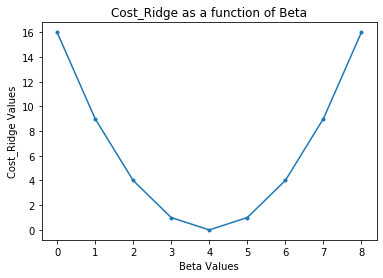

In [3]:
c = []
y = 4
b = [0,1,2,3,4,5,6,7,8]
for i in range(len(b)):
    c.append((y-b[i])**2)

plt.plot(b, c, '.-')
plt.xlabel('Beta Values')
plt.ylabel('Cost_Ridge Values')
plt.title('Cost_Ridge as a function of Beta')
plt.show()

#### What is $\hat\beta$, the value of  that minimizes $C_{ridge}$?
#### (Hint: Recall that to find the maximum or minimum of a function f(), you need to solve the equation ddf()=0).

We have to take the $C_{ridge}$ equation: $$C_{ridge} = (y-\beta)^2$$
and take the partial derivative with respect to beta and set it equal to 0. In doing so, we get $$\frac{\delta}{\delta\beta} C_{ridge} = -2(y-\beta)$$
setting to zero and rearranging the terms, we get
$$\hat\beta = y$$


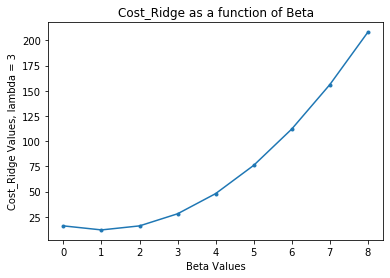

In [4]:
# Now plot Cridge as a function of  for l=3 
# (i.e. increase the regularization). Show that the new  is given by the formula in (6.14). 

c = []
y = 4
l = 3
b = [0,1,2,3,4,5,6,7,8]
for i in range(len(b)):
    c.append((y-b[i])**2 + l*(b[i]**2))

plt.plot(b, c, '.-')
plt.xlabel('Beta Values')
plt.ylabel('Cost_Ridge Values, lambda = 3')
plt.title('Cost_Ridge as a function of Beta')
plt.show()

If the $C_{ridge}$ formula is now 
$$C_{ridge} = (y-\beta)^2 + \lambda\beta^2$$
then the partial derivative is 
$$\frac{\delta}{\delta\beta} C_{ridge} = -2(y-\beta) + 2\lambda\beta$$
setting the equation to zero, expanding, and dividing by 2 we get
$$-y+\hat\beta+\lambda\beta = 0$$
rearranging the terms and solving for $\hat\beta$ we get 
$$\hat\beta = \frac{y}{1+\lambda}$$
and plugging in 4 for $\lambda$, we get 
$$\hat\beta = \frac{y}{4}$$

### If  were to keep increasing, lambda what would happen to beta? Would this make the model more flexible or less flexible?.

If we were to keep increasing $\lambda$, $\beta$ would keep getting closer and closer to 0. This would make the model less flexible. 

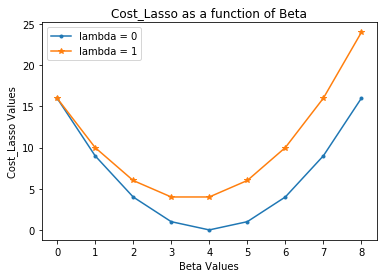

In [5]:
# Consider Eq. (6.13) in the book, the cost function for LASSO
# (“Least Absolute Shrinkage and Selection Operator”), with p=1:
# Assuming y=4, make plots showing C_lasso as a function of  for lambda=0 and lambda=1.
# Comment on the minimum value, beta , for each value of lambda.


c_0 = []
c_1 = []
y = 4
l_0 = 0
l_1 = 1
b = [0,1,2,3,4,5,6,7,8]
for i in range(len(b)):
    c_0.append((y-b[i])**2 + l_0*abs(b[i]))
    c_1.append((y-b[i])**2 + l_1*abs(b[i]))

plt.plot(b, c_0, '.-', label='lambda = 0')
plt.plot(b, c_1, '*-', label='lambda = 1')
plt.xlabel('Beta Values')
plt.ylabel('Cost_Lasso Values')
plt.title('Cost_Lasso as a function of Beta')
plt.legend()
plt.show()

If $\lambda = 0$, then the $\hat\beta$ value will just be $\hat\beta = y$
$$\newline$$
If $\lambda = 1$, then the $\hat\beta$ value will be $$\hat\beta = y-\frac{1}{2}, if y > \frac{1}{2},$$

 $$= y+\frac{1}{2}, if y < -\frac{1}{2},$$
 $$= 0,  if |y| \leq \frac{1}{2}$$

### Describe the main difference between Ridge Regression and LASSO.
The main difference between Ridge Regression and LASSO is that ridge regression minimizes parameters that are irrelevant i.e. have low coefficients, and Lasso punishes coefficients that are too high and actually sets them to zero

In [6]:
data = pd.read_csv('anesthesia.csv')
data.head()

,Time,F0Hz_1,F1Hz_2,F3Hz_3,F4Hz_4,F5Hz_5,F6Hz_6,F8Hz_7,F9Hz_8,F10Hz_9,...,F115Hz_95,F116Hz_96,F117Hz_97,F119Hz_98,F120Hz_99,F121Hz_100,F122Hz_101,F124Hz_102,F125Hz_103,BehaviorResponse
0,5.004,3.115293,1.676500,1.097419,0.900837,0.537178,0.454494,0.512818,-0.131658,-0.121557,...,-3.219340,-3.164443,-3.336400,-3.259790,-3.270283,-3.219549,-3.275714,-3.298578,-3.314389,1.0
1,15.004,2.864158,1.499845,0.879378,1.020294,0.281333,0.722017,0.086080,0.080071,0.119713,...,-2.654771,-2.591587,-2.877959,-3.199018,-2.826822,-2.686335,-2.703506,-2.967259,-3.050596,1.0
2,25.004,2.039253,1.057344,0.163134,0.351954,0.149567,0.325558,0.231917,0.284673,-0.079226,...,-2.806694,-2.936570,-2.922557,-3.094296,-3.047691,-2.992025,-2.997460,-3.022261,-3.012685,1.0
3,35.004,2.417074,0.348083,0.582521,0.468952,0.176949,0.116783,0.200230,0.166558,0.185396,...,-3.646892,-3.907626,-3.773453,-3.645338,-3.830424,-4.055349,-4.010275,-3.829455,-3.847508,1.0
4,45.004,2.507836,1.036731,0.622822,0.436470,0.465713,0.703881,0.048926,-0.327707,0.073882,...,-2.835312,-2.807076,-2.909298,-3.070029,-2.993807,-2.875189,-2.894030,-3.065111,-3.130724,1.0


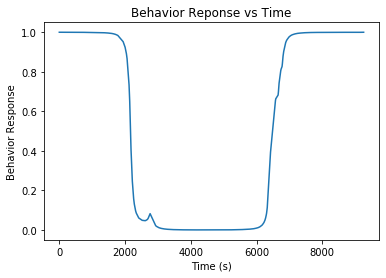

In [7]:
# Make a plot showing Time vs. BehaviorResponse. Make sure to label the axes. 
# This shows the timecourse of the study, with the subject starting out awake (BehaviorResponse=1),
# transitioning into general anesthesia (BehaviorResponse=0), and later emerging from anesthesia (BehaviorResponse=1 again).

plt.plot(data['Time'], data['BehaviorResponse'])
plt.xlabel('Time (s)')
plt.ylabel('Behavior Response')
plt.title('Behavior Reponse vs Time')
plt.show()

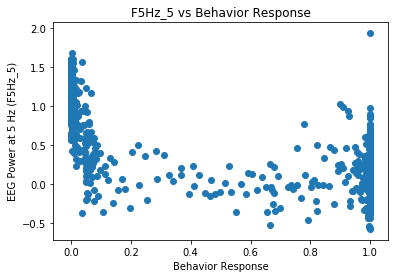

In [8]:
# Make a scatter plot showing BehaviorResponse vs. EEG power at 5 Hz (F5Hz_5).
# Make sure to label the axes. Describe, in words, the relationship between these variables.

plt.scatter(data['BehaviorResponse'], data['F5Hz_5'])
plt.xlabel('Behavior Response')
plt.ylabel('EEG Power at 5 Hz (F5Hz_5)')
plt.title('F5Hz_5 vs Behavior Response')
plt.show()

For these two variables, its difficult to see but is a slight negative relationship between them. If anything, there are higher EEG powers where the behavior response is 0, and lower when the behavior response is 1. 

In [9]:
# What is the correlation coefficient between BehaviorResponse and EEG power at 5 Hz (F5Hz_5)?
r, _ = scipy.stats.pearsonr(data['BehaviorResponse'], data['F5Hz_5'])
print('Correlation coefficient: ', r)

Correlation coefficient:  -0.7218392941649985


In [10]:
# Fit a simple linear regression model of the form, BehaviorResponse ~ 1 + F5Hz_5. 
# Is the slope parameter statistically significant? 

res = smf.ols(formula='BehaviorResponse ~ 1 + F5Hz_5', data=data).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       BehaviorResponse   R-squared:                       0.521
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     1005.
Date:                Fri, 08 Nov 2019   Prob (F-statistic):          7.13e-150
Time:                        04:32:36   Log-Likelihood:                -281.47
No. Observations:                 926   AIC:                             566.9
Df Residuals:                     924   BIC:                             576.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8770      0.015     57.253      0.0

Since the p-value of the F5Hz_5 slope is less than 0.05, the slope is statistically significant

In [11]:
# Fit a multiple linear regression that uses all of the EEG power features (i.e. 103 predictors, plus an intercept). 
# What is the p-value of the slope for F5Hz_5? Is it statistically significant?
# What can you say about the values for the estimates of this model versus the one in part (d)?

features = data.columns.values[1:-1] 
formula = 'BehaviorResponse ~ ' + ' + '.join(features)
res = smf.ols(formula, data=data).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:       BehaviorResponse   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.869
Method:                 Least Squares   F-statistic:                     60.54
Date:                Fri, 08 Nov 2019   Prob (F-statistic):          3.02e-319
Time:                        04:32:37   Log-Likelihood:                 373.22
No. Observations:                 926   AIC:                            -538.4
Df Residuals:                     822   BIC:                            -36.03
Df Model:                         103                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6519      0.131      4.994      0.0

The P-value for F5Hz_5 is 0.974 which means that the variable is not statistically significant. Most of the variables are not statistically significant, however, looked at on their own it would seem like they would be just like with F5Hz_5. 

In [12]:
# Now write a for loop to fit 103 separate linear models of the form,
# BehaviorResponse ~ 1 + X1, where X1 is one of the EEG power features. 
# For each fit, keep track of the mean squared error. 
# (Note for this step we are not using cross-validation; just use the MSE for the training data.) 

mse = []
P = 103
for j in range(P):
    formula = 'BehaviorResponse ~ ' + ' + ' + features[j]
    res = smf.ols(formula, data=data).fit()
    #print(res.summary())
    yhat = res.predict()
    mse.append(mean_squared_error(data['BehaviorResponse'], yhat))

The best feature that gives the best prediction is  F11Hz_10


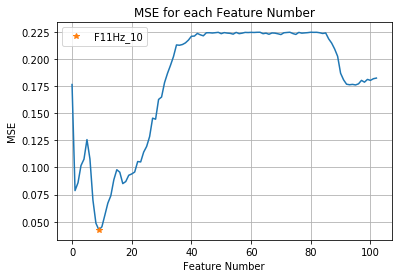

In [13]:
# Make a plot showing MSE vs. feature number using the data from (f). Using these results, 
# which single feature gives the best prediction (lowest MSE)?

feature_nums = list(range(P))
lowest = np.argmin(mse)
print('The best feature that gives the best prediction is ', features[lowest])
plt.plot(feature_nums, mse)
plt.plot(lowest, mse[lowest], '*', label='F11Hz_10')
plt.grid()
plt.xlabel('Feature Number')
plt.ylabel('MSE')
plt.title('MSE for each Feature Number')
plt.legend()
plt.show()

In [14]:
# Now write a loop to fit 102 models of the form, BehaviorResponse ~ 1 + X1 + X2,
# where X1 is the best feature obtained from part (f) and X2 is one of the other features.
# Which combination of two features gives the best prediction?

features = features.tolist()
best_feat = features.pop(lowest)
mse = []
P = 102
for j in range(P):
    formula = 'BehaviorResponse ~ ' + ' + ' + best_feat + ' + ' + features[j]
    res = smf.ols(formula, data=data).fit()
    #print(res.summary())
    yhat = res.predict()
    mse.append(mean_squared_error(data['BehaviorResponse'], yhat))

The best feature that gives the best prediction is  F12Hz_11


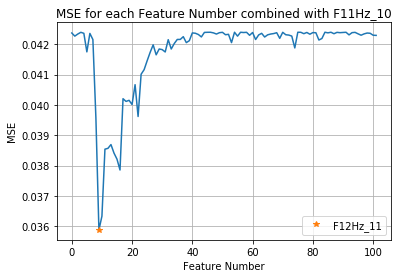

In [15]:
feature_nums = list(range(P))
lowest = np.argmin(mse)
print('The best feature that gives the best prediction is ', features[lowest])
plt.plot(feature_nums, mse)
plt.plot(lowest, mse[lowest], '*', label=features[lowest])
plt.grid()
plt.xlabel('Feature Number')
plt.ylabel('MSE')
plt.title('MSE for each Feature Number combined with F11Hz_10')
plt.legend()
plt.show()

The combination of features that gives the best predictions are F11Hz_10 and F12Hz_11. 

In [16]:
# Using X1 and X2 chosen in part (g), perform 5-fold cross-validation with k=5.
# What are the training and testing MSE for this model?

k = 5 
kf = KFold(n_splits=k, shuffle=True)
formula = 'BehaviorResponse ~ 1 + F11Hz_10 + F12Hz_11'
train_trrs = []
test_trrs = []
for train_index, test_index in kf.split(data):
    data_train = data.iloc[train_index, :-1]
    train_y = data.iloc[train_index, -1:]
    data_test = data.iloc[test_index, :-1]
    test_y = data.iloc[test_index, -1:]

    # linear regression
    res = smf.ols(formula, data=data).fit()
    # total error rate 
    train_yhat = res.predict(data_train)
    train_trr = mean_squared_error(train_y, train_yhat)
    train_trrs.append(train_trr)

    test_yhat = res.predict(data_test)
    test_trr = mean_squared_error(test_y, test_yhat)
    test_trrs.append(test_trr)

mean_train_error = np.mean(train_trrs)
mean_test_error = np.mean(test_trrs)
print('Mean train error:', mean_train_error)
print('Mean test error:', mean_test_error)

Mean train error: 0.035881825606204676
Mean test error: 0.035875123403028925
